**Assignment Specifications**

**JHU CSSE COVID-19 Dataset**
* Link :  https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
* using a big data analysis platform (Spark)
* To generate a Monthly report  of the top 10 states having the highest Infection Fatality Ratio (IFR)

**Step 1: Setup Google Colab**

**Step 2: Install pyspark,pandas, pycountry, cartopy**

Run the following commands in a code cell to
> install pyspark

> install pandas

> install pycountry

> installcartopy

In [1]:
#!pip install basemap

In [2]:
#!pip install pyspark

In [3]:
#!pip install pycountry

In [4]:
#!pip install pandas

In [5]:
#!pip install cartopy

**Step 3: Load COVID-19 Data using PySpark**
* Connect Google Drive in a Google Colab notebook
* Use the provided repository or the PySpark library to load the COVID-19 data into a DataFrame.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month

# Create a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/drive/MyDrive/Colab Data/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports_us/*.csv", header=True)

**Step 4: Preprocess the data**
* cleaning, filtering, aggregation by month
* To filter out rows with missing values

In [8]:
# Preprocess the data (cleaning, filtering, aggregation by month)To filter out rows with missing values
data = data.filter(col("Confirmed").isNotNull() & col("Deaths").isNotNull())
print("Preprocessed Data:")
data.show(truncate=False)

Preprocessed Data:
+--------------------+--------------+-------------------+-------+---------+---------+------+---------+--------+-------+------------------+------------------+-------------------+-------------------+----------+----+---------------------+--------------------+----------+-------------+------------------+
|Province_State      |Country_Region|Last_Update        |Lat    |Long_    |Confirmed|Deaths|Recovered|Active  |FIPS   |Incident_Rate     |Total_Test_Results|People_Hospitalized|Case_Fatality_Ratio|UID       |ISO3|Testing_Rate         |Hospitalization_Rate|Date      |People_Tested|Mortality_Rate    |
+--------------------+--------------+-------------------+-------+---------+---------+------+---------+--------+-------+------------------+------------------+-------------------+-------------------+----------+----+---------------------+--------------------+----------+-------------+------------------+
|Alabama             |US            |2020-08-28 04:30:22|32.3182|-86.9023 |121

**Step 5: Calculate Infection Fatality Ratio (IFR)**

The Infection Fatality Ratio (IFR) can be calculated using the formula:

$IFR= (Number of Deaths/Number of Infected) ×100$

i.e. $IFR= (Deaths/confirmed) ×100$

In [9]:
# Calculate Infection Fatality Ratio (IFR)
data = data.withColumn("IFR", (col("Deaths") / col("Confirmed") * 100))

# Print the data with the newly added IFR column
print("Data with Infection Fatality Ratio (IFR):")
data.show(truncate=False)

Data with Infection Fatality Ratio (IFR):
+--------------------+--------------+-------------------+-------+---------+---------+------+---------+--------+-------+------------------+------------------+-------------------+-------------------+----------+----+---------------------+--------------------+----------+-------------+------------------+------------------+
|Province_State      |Country_Region|Last_Update        |Lat    |Long_    |Confirmed|Deaths|Recovered|Active  |FIPS   |Incident_Rate     |Total_Test_Results|People_Hospitalized|Case_Fatality_Ratio|UID       |ISO3|Testing_Rate         |Hospitalization_Rate|Date      |People_Tested|Mortality_Rate    |IFR               |
+--------------------+--------------+-------------------+-------+---------+---------+------+---------+--------+-------+------------------+------------------+-------------------+-------------------+----------+----+---------------------+--------------------+----------+-------------+------------------+------------------


**Step 6: Generate Monthly Report for Top 10 States with Highest IFR**



In [10]:
from pyspark.sql.functions import month

# Convert "Last_Update" to a timestamp column
data = data.withColumn("Last_Update", col("Last_Update").cast("timestamp"))

# Extract month from "Last_Update"
data = data.withColumn("Month", month("Last_Update"))

# Calculate Infection Fatality Ratio (IFR)
data = data.withColumn("IFR", (col("Deaths") / col("Confirmed") * 100))

# Rank states based on IFR for each month
ranked_states = data.groupBy("Month", "Province_State").agg({"IFR": "avg"}).orderBy(col("avg(IFR)").desc()).limit(10)

# Print the ranked states
print("Top 10 States Ranked by Average IFR for Each Month:")
ranked_states.show(truncate=False)

Top 10 States Ranked by Average IFR for Each Month:
+-----+------------------------+------------------+
|Month|Province_State          |avg(IFR)          |
+-----+------------------------+------------------+
|6    |Northern Mariana Islands|6.013445465355325 |
|6    |Connecticut             |4.338322038840486 |
|5    |Michigan                |4.337749280364032 |
|7    |Connecticut             |4.28041822709331  |
|5    |Connecticut             |4.22654921067968  |
|7    |New Jersey              |4.222963384028902 |
|6    |Michigan                |4.2101200750479295|
|5    |Northern Mariana Islands|4.159998612636446 |
|8    |Connecticut             |4.101292986379744 |
|4    |Northern Mariana Islands|4.081592332475688 |
+-----+------------------------+------------------+



**Step 7: Generate Monthly Report for Top 10 States Ranked by Average IFR for Each Month**

In [11]:
# Calculate Infection Fatality Ratio (IFR)
data = data.withColumn("IFR", (col("Deaths") / col("Confirmed") * 100))

# Generate Monthly Report and Rank states based on IFR for each month
for month in range(1, 13):
    monthly_data = data.filter(col("Month") == month)
    ranked_states = monthly_data.groupBy("Province_State").agg({"IFR": "avg"}).orderBy(col("avg(IFR)").desc()).limit(10)

    # Print the ranked states for each month
    print(f"\nMonth {month} Top 10 States by Average IFR:")
    ranked_states.show(truncate=False)


Month 1 Top 10 States by Average IFR:
+--------------+------------------+
|Province_State|avg(IFR)          |
+--------------+------------------+
|Grand Princess|2.912621359223301 |
|New Jersey    |2.033314616029403 |
|New York      |1.9898352211343988|
|Connecticut   |1.9211869541700415|
|Pennsylvania  |1.8455212096832294|
|Michigan      |1.8085806132179107|
|Mississippi   |1.745847061301364 |
|Louisiana     |1.6743186957415785|
|Massachusetts |1.6167590244450645|
|Maryland      |1.562252594036915 |
+--------------+------------------+


Month 2 Top 10 States by Average IFR:
+--------------+------------------+
|Province_State|avg(IFR)          |
+--------------+------------------+
|Grand Princess|2.9126213592233006|
|New Jersey    |1.9043116349557174|
|Pennsylvania  |1.8455457227088896|
|New York      |1.8249733139531352|
|Connecticut   |1.81356038879054  |
|Michigan      |1.791026550741264 |
|Mississippi   |1.6979376033694813|
|Louisiana     |1.5869245436420891|
|Maryland      |1.548

--------------------------------------------------------------------------------

**Step 8:  Plot IFR Data on a US colored Map**
>Install basemap

In [12]:
#!pip install basemap

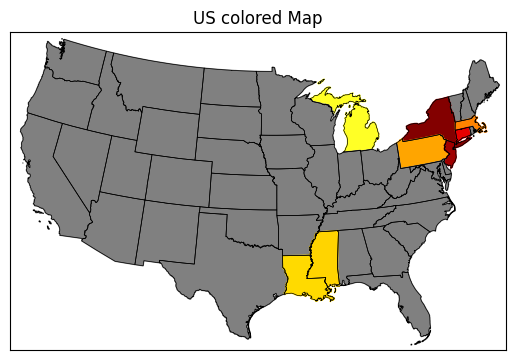

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries. Data from U.S Census Bureau: http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/content/drive/MyDrive/Colab Data/Saving Code Data CVS/Principle of Big Data Management/Assignment-1/Picture of Images of US Map/st99_d00', 'states', drawbounds=True)

# IFR density by state
popdensity = ranked_states.toPandas()  # Convert Spark DataFrame to Pandas DataFrame
popdensity.set_index('Province_State', inplace=True)

# choose a color for each state based on population density.
colors = {}
statenames = []
cmap = plt.cm.hot  # use 'hot' colormap
vmin = popdensity['avg(IFR)'].min()
vmax = popdensity['avg(IFR)'].max()

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia', 'Puerto Rico']:
        if statename in popdensity.index:  # Check if state exists in popdensity
            pop = popdensity.loc[statename, 'avg(IFR)']
            # calling colormap with value between 0 and 1 returns
            # rgba value. Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1. - np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
        statenames.append(statename)

# cycle through state names, color each one.
ax = plt.gca()  # get the current axes instance
for shapedict, seg in zip(m.states_info, m.states):
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia', 'Puerto Rico']:
        color = rgb2hex(colors[statename]) if statename in colors else 'grey'  # Use grey color if state not in colors
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

plt.title('US colored Map')
plt.show()


**For Annual data map**

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month

# Create a Spark session
spark = SparkSession.builder.appName("CovidAnalysis").getOrCreate()
# Load the dataset
data = spark.read.csv("/content/drive/MyDrive/Colab Data/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports_us/*.csv", header=True)
# Preprocess the data (cleaning, filtering, aggregation by month) To filter out rows with missing values
data = data.filter(col("Confirmed").isNotNull() & col("Deaths").isNotNull())
#print("Preprocessed Data:")
#data.show(truncate=False)

In [15]:
from pyspark.sql import functions as F

# Calculate Infection Fatality Ratio (IFR)
data = data.withColumn("IFR", (F.col("Deaths") / F.col("Confirmed") * 100))

# Generate Annual Report and Rank states based on average IFR for the entire year
annual_data = data.groupBy("Province_State").agg(F.avg("IFR").alias("avg_IFR")).orderBy(F.col("avg_IFR").desc())

# Print the ranked states for the entire year
print("\nAnnual States Ranked by Average IFR:")
annual_data.show(truncate=False)


Annual States Ranked by Average IFR:
+------------------------+------------------+
|Province_State          |avg_IFR           |
+------------------------+------------------+
|Connecticut             |3.2262959681418817|
|New Jersey              |3.1576368611182066|
|New York                |3.1237866720888343|
|Grand Princess          |2.882452964730401 |
|Michigan                |2.84559104895654  |
|Pennsylvania            |2.6779303282151177|
|Massachusetts           |2.6369868539793213|
|Louisiana               |2.3095926086643743|
|District of Columbia    |2.1816505926199974|
|Indiana                 |2.1570836647722826|
|Mississippi             |2.155333664940372 |
|Maryland                |2.1243916705188908|
|Northern Mariana Islands|2.105791657200426 |
|Ohio                    |2.1044516623002534|
|Rhode Island            |2.0822035105517536|
|New Mexico              |1.9949801474500584|
|New Hampshire           |1.9545362780505742|
|Illinois                |1.93523030029017

**For  Annual 50 states map**

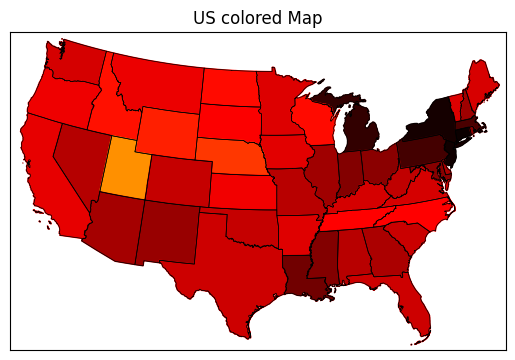

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries. Data from U.S Census Bureau: http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/content/drive/MyDrive/Colab Data/Saving Code Data CVS/Principle of Big Data Management/Assignment-1/Picture of Images of US Map/st99_d00', 'states', drawbounds=True)

# IFR density by state
popdensity = annual_data.toPandas()  # Convert Spark DataFrame to Pandas DataFrame
popdensity.set_index('Province_State', inplace=True)

# choose a color for each state based on population density.
colors = {}
statenames = []
cmap = plt.cm.hot  # use 'hot' colormap
vmin = popdensity['avg_IFR'].min()
vmax = popdensity['avg_IFR'].max()

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia', 'Puerto Rico']:
        pop = popdensity.loc[statename, 'avg_IFR']
        # calling colormap with value between 0 and 1 returns
        # rgba value. Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1. - np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
    statenames.append(statename)

# cycle through state names, color each one.
ax = plt.gca()  # get the current axes instance
for nshape, seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia', 'Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

plt.title('US colored Map')
plt.show()

**For  Annual Top 10 states map**

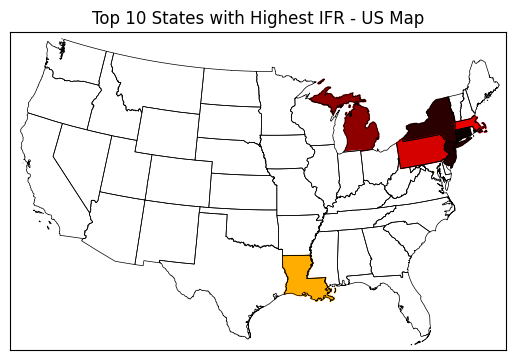

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries. Data from U.S Census Bureau: http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/content/drive/MyDrive/Colab Data/Saving Code Data CVS/Principle of Big Data Management/Assignment-1/Picture of Images of US Map/st99_d00', 'states', drawbounds=True)

# IFR density by state
popdensity = annual_data.toPandas()  # Convert Spark DataFrame to Pandas DataFrame
popdensity.set_index('Province_State', inplace=True)

# Sort the DataFrame by 'avg_IFR' and select the top 10 states
top_states = popdensity.sort_values(by='avg_IFR', ascending=False).head(10)

# choose a color for each state based on population density.
colors = {}
statenames = []
cmap = plt.cm.hot  # use 'hot' colormap
vmin = top_states['avg_IFR'].min()
vmax = top_states['avg_IFR'].max()

for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename in top_states.index:
        pop = top_states.loc[statename, 'avg_IFR']
        colors[statename] = cmap(1. - np.sqrt((pop - vmin) / (vmax - vmin)))[:3]
    statenames.append(statename)

# cycle through state names, color each one.
ax = plt.gca()  # get the current axes instance
for nshape, seg in enumerate(m.states):
    if statenames[nshape] in top_states.index:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

plt.title('Top 10 States with Highest IFR - US Map')
plt.show()
